In [101]:
import urllib.request
import re
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import urllib
from datetime import datetime
from datetime import date
import time
import random

from sqlalchemy import create_engine, Table, MetaData, Column, Integer, String, Float,DateTime,Date
from sqlalchemy import select, desc,exists,and_
from sqlalchemy.sql import func

#Create DB and Tables 
engine = create_engine('sqlite:///superpharmDB5.db', echo=False,connect_args={'timeout': 100})
metadata = MetaData()

items = Table('items', metadata,
    Column('id', Integer,primary_key=True),
    Column('name', Integer),
    Column('description', String),
    Column('department', String),
    Column('category', String),
    Column('brand', String),
    Column('url', String),
    Column('image_url', String),
    Column('update_date', DateTime)
)
prices = Table('prices', metadata,
    Column('item_id', Integer),
    Column('amount', Float),
    Column('date', Date)
)
metadata.create_all(engine)
with engine.connect() as conn:
# conn = engine.connect()

    #Reset list product errors
    errorsproduct = []

    #Define Browser
    headers = {'User-Agent': 'Mozilla/5.0'}
    user_agent_list = [
       #Chrome
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        #Firefox
        'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
        'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
        'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
    ]

    #Set Main Url
    url = 'http://shop.super-pharm.co.il'
    c = 0
    user_agent = random.choice(user_agent_list)
    headers['User-Agent'] = user_agent
    resp_dep = requests.get(url,headers=headers)
    s_dep = bs(resp_dep.text, 'html.parser')

    #Find All Departments
    dep_rows = s_dep.find_all('li',class_='header-bottom-nav-menu')
    for department in dep_rows:
#         c += 1   
    #     if c == 0 or c == 1 or c == 2 or c==3: 
    #         continue 

        d_name = department.a['title']
        d_url = department.a['href']
        #   time.sleep(random.randint(10, 21))
        user_agent = random.choice(user_agent_list)
        headers['User-Agent'] = user_agent
        resp_cat = requests.get(url+ d_url,headers=headers)
        print(c)
        s_categories = bs(resp_cat.text, 'html.parser')

        #Find All Category by Department
        categories_rows = s_categories.find_all('p' , class_ = ['phcCatImage','phcCategoryImage',' phcCategoriesImage'])

        if d_url[1:] in ['baby','elder','medical-accessories','nature','pharmacy','promotions','coupons']:
            continue
        print("Department", d_name)
        print("\n")

        for c_num , category in enumerate(categories_rows):
            c_name = category.a['title']
            print(c_name) 
            c_url = category.a['href']
    #         if c_url == '/dermocosmetics' or c_url == 'https://optic-express.co.il/16-toric' or (d_name == 'אופטיקה' and \
    #                                                                                          c_num in (0,1,2,3,4,5,6,7)):
    #             continue
            if c_url == '/dermocosmetics' or c_url == 'https://optic-express.co.il/16-toric':
                continue
            resp_item = requests.get(url + c_url) #+ d_url 

            s_items = bs(resp_item.text, 'html.parser')
            print(url+ c_url)

            #Find All Products by Category
            products = s_items.find('div',class_ ='clearfix boxes-wrap').find_all('a')

            for product in products:
                
                try:
                    prod_url = url + product.get('href')
                    prod_item_box = product.find(class_ = "item-box")
                    prod_id = prod_item_box['data-id']
                    prod_brand = prod_item_box.h4.text
                    prod_name= prod_item_box.p.text
                    prod_image_url = prod_item_box.find(class_ ='item-image').img['src']
                    s_desc = prod_item_box.find(class_ = 'description-wrap')
                    if s_desc != None:
                        prod_desc = s_desc.span.text
                    else:
                        prod_desc = ''
                    priceclass = prod_item_box.find(class_ = 'item-price special-price')
                    if priceclass is None :
                        priceclass = product.find(class_ = "item-box").find(class_ = 'item-price no-special') 
                        p_shekels = priceclass.find(class_='shekels money-sign').text
#                         print("price:",p_shekels)
                        p_cents = priceclass.find(class_='cents').text
                    else:
                        p_shekels = priceclass.find_all(class_='shekels money-sign')[1].text
#                         print("else:",p_shekels)
                        p_cents = priceclass.find_all(class_='cents')[1].text
                    
                    prod_price = float((p_shekels.replace(',','')) + '.' + p_cents) 

                    #Insert to DB:
                    s = items.select().where(items.c.id == prod_id)
                    s = exists(s).select()
#                     print(s)
                    result = conn.execute(s).scalar()
#                     print("before" , result)
#                     print(type(prod_desc))
                    
                    if not result :
                        
                        try:
                            
                            ins = items.insert().values(id=prod_id, 
                                                        name=prod_name,
                                                        description=prod_desc,
                                                        department=d_name, 
                                                        category=c_name, 
                                                        brand=prod_brand, 
                                                        url=prod_url, 
                                                        image_url=prod_image_url,
                                                        update_date=date.today())

                            result = conn.execute(ins)
                        except Exception as e:
                            errorsproduct.append(e)
                            print(e)
                        
                        print("inserted data",prod_id )

                    s = prices.select().where(and_(prices.c.date == date.today(), prices.c.item_id == prod_id))
                    s = exists(s).select()
                    result = conn.execute(s).scalar()

                    if not result :

                        ins = prices.insert().values(item_id=prod_id, \
                                                    amount=prod_price, \
                                                    date=date.today())


                        result = conn.execute(ins)
                        print("inserted data price ",prod_id , prod_price )

                except Exception as e:
                    errorsproduct.append(product)
#                 break

#             break
            time.sleep(random.randint(10, 21))
            user_agent = random.choice(user_agent_list)
            headers['User-Agent'] = user_agent

    

  


1
Department לבית


מוצרי ניקיון לבית
http://shop.super-pharm.co.il/house/cleaning-laundry/cleaning/c/40110
inserted data 521700
inserted data price  521700 7.9
inserted data 351018
inserted data price  351018 8.0
inserted data 461694
inserted data price  461694 10.9
inserted data 340973
inserted data price  340973 8.0
inserted data 421345
inserted data price  421345 12.9
inserted data 463053
inserted data price  463053 9.9
inserted data 1640
inserted data price  1640 15.9
inserted data 499054
inserted data price  499054 12.9
inserted data 1618
inserted data price  1618 22.9
inserted data 530958
inserted data price  530958 9.9
inserted data 489014
inserted data price  489014 9.9
inserted data 285765
inserted data price  285765 8.0
inserted data 353558
inserted data price  353558 17.9
inserted data 483042
inserted data price  483042 8.9
inserted data 415542
inserted data price  415542 11.9
inserted data 500525
inserted data price  500525 16.9
inserted data 463820
inserted data price  46

inserted data 504704
inserted data price  504704 10.0
inserted data 500126
inserted data price  500126 6.9
inserted data 537310
inserted data price  537310 10.0
inserted data 451379
inserted data price  451379 16.9
מזון בריאות
http://shop.super-pharm.co.il/house/healthfood/c/40300
inserted data 467607
inserted data price  467607 4.9
inserted data 476470
inserted data price  476470 19.9
inserted data 376751
inserted data price  376751 14.9
inserted data 434295
inserted data price  434295 10.0
inserted data 434294
inserted data price  434294 10.0
inserted data 251425
inserted data price  251425 14.9
inserted data 184462
inserted data price  184462 15.9
inserted data 518717
inserted data price  518717 4.9
inserted data 184466
inserted data price  184466 15.9
inserted data 508574
inserted data price  508574 12.7
inserted data 236300
inserted data price  236300 19.9
inserted data 247313
inserted data price  247313 4.0
inserted data 527780
inserted data price  527780 10.0
inserted data 44292

inserted data 587817
inserted data price  587817 49.9
inserted data 594315
inserted data price  594315 49.9
גרביים והלבשה
http://shop.super-pharm.co.il/house/home-accessories/socks/c/30620
inserted data 525168
inserted data price  525168 22.9
inserted data 525169
inserted data price  525169 22.9
inserted data 525166
inserted data price  525166 22.9
inserted data 525167
inserted data price  525167 22.9
inserted data 542684
inserted data price  542684 26.0
inserted data 542683
inserted data price  542683 26.0
inserted data 545786
inserted data price  545786 24.9
inserted data 355946
inserted data price  355946 29.9
inserted data 284390
inserted data price  284390 24.9
inserted data 284388
inserted data price  284388 24.9
inserted data 555068
inserted data price  555068 24.9
inserted data 529452
inserted data price  529452 13.9
inserted data 529453
inserted data price  529453 13.9
inserted data 545793
inserted data price  545793 69.9
inserted data 548699
inserted data price  548699 28.0
i

inserted data price  602976 23.9
inserted data 580456
inserted data price  580456 10.0
inserted data 272492
inserted data price  272492 15.9
inserted data 513103
inserted data price  513103 10.0
inserted data 547238
inserted data price  547238 16.9
inserted data 547235
inserted data price  547235 16.9
inserted data 580284
inserted data price  580284 19.9
inserted data 567513
inserted data price  567513 19.9
inserted data 567514
inserted data price  567514 19.9
inserted data 567512
inserted data price  567512 19.9
inserted data 365500
inserted data price  365500 19.9
inserted data 314302
inserted data price  314302 15.9
inserted data 436768
inserted data price  436768 19.9
inserted data 521993
inserted data price  521993 15.9
inserted data 360720
inserted data price  360720 10.0
inserted data 405188
inserted data price  405188 10.0
inserted data 527540
inserted data price  527540 9.9
inserted data 527539
inserted data price  527539 9.9
inserted data 474809
inserted data price  474809 9.

inserted data price  198428 25.9
inserted data 14005
inserted data price  14005 25.9
inserted data 309604
inserted data price  309604 27.9
inserted data 254017
inserted data price  254017 13.9
inserted data 250889
inserted data price  250889 29.9
inserted data 477092
inserted data price  477092 14.9
inserted data 445997
inserted data price  445997 14.9
inserted data 213134
inserted data price  213134 27.9
inserted data 309603
inserted data price  309603 13.9
inserted data 434738
inserted data price  434738 25.9
inserted data 429971
inserted data price  429971 14.9
inserted data 9343
inserted data price  9343 50.9
inserted data 434739
inserted data price  434739 25.9
inserted data 429870
inserted data price  429870 29.9
inserted data 517927
inserted data price  517927 13.9
inserted data 254018
inserted data price  254018 13.9
inserted data 382140
inserted data price  382140 13.9
inserted data 254015
inserted data price  254015 13.9
היגיינה אינטימית
http://shop.super-pharm.co.il/care/int

inserted data 358952
inserted data price  358952 29.9
inserted data 375361
inserted data price  375361 24.9
inserted data 9364
inserted data price  9364 54.9
inserted data 284731
inserted data price  284731 27.9
inserted data 416271
inserted data price  416271 36.9
inserted data 1189
inserted data price  1189 9.9
inserted data 9164
inserted data price  9164 8.9
inserted data 533941
inserted data price  533941 25.9
inserted data 333092
inserted data price  333092 27.9
inserted data 521903
inserted data price  521903 29.9
inserted data 421348
inserted data price  421348 36.9
inserted data 516602
inserted data price  516602 24.9
inserted data 516601
inserted data price  516601 24.9
inserted data 2834
inserted data price  2834 18.9
inserted data 534655
inserted data price  534655 44.9
inserted data 454052
inserted data price  454052 39.9
inserted data 502919
inserted data price  502919 12.9
inserted data 47482
inserted data price  47482 14.9
inserted data 284733
inserted data price  284733

inserted data 575849
inserted data price  575849 1382.5
inserted data 565176
inserted data price  565176 651.0
inserted data 494041
inserted data price  494041 1890.0
inserted data 431775
inserted data price  431775 82.5
inserted data 512849
inserted data price  512849 82.5
inserted data 138423
inserted data price  138423 36.9
ציפורניים
http://shop.super-pharm.co.il/cosmetics/nails/c/90600
inserted data 360245
inserted data price  360245 11.9
inserted data 360246
inserted data price  360246 11.9
inserted data 374422
inserted data price  374422 29.9
inserted data 548969
inserted data price  548969 9.9
inserted data 553489
inserted data price  553489 39.9
inserted data 548971
inserted data price  548971 19.9
inserted data 506064
inserted data price  506064 8.9
inserted data 152285
inserted data price  152285 39.9
inserted data 480452
inserted data price  480452 64.9
inserted data 480453
inserted data price  480453 64.9
inserted data 374421
inserted data price  374421 54.9
inserted data 5

inserted data 500150
inserted data price  500150 64.4
inserted data 560958
inserted data price  560958 50.0
inserted data 489489
inserted data price  489489 64.4
inserted data 588967
inserted data price  588967 45.0
inserted data 540845
inserted data price  540845 79.9
inserted data 324182
inserted data price  324182 71.9
inserted data 581404
inserted data price  581404 191.2
inserted data 581405
inserted data price  581405 191.2
inserted data 578012
inserted data price  578012 40.0
איפור שפתיים
http://shop.super-pharm.co.il/cosmetics/makeup/lips-makeup/c/90320
inserted data 589814
inserted data price  589814 94.9
inserted data 312337
inserted data price  312337 39.9
inserted data 518825
inserted data price  518825 45.5
inserted data 432784
inserted data price  432784 42.0
inserted data 585460
inserted data price  585460 46.5
inserted data 562031
inserted data price  562031 14.9
inserted data 583172
inserted data price  583172 69.9
inserted data 562505
inserted data price  562505 27.9


inserted data price  539830 199.0
inserted data 539831
inserted data price  539831 199.0
inserted data 539841
inserted data price  539841 199.0
inserted data 539774
inserted data price  539774 199.0
inserted data 443489
inserted data price  443489 399.0
inserted data 600466
inserted data price  600466 499.0
inserted data 600474
inserted data price  600474 499.0
inserted data 600469
inserted data price  600469 499.0
inserted data 600486
inserted data price  600486 499.0
inserted data 600485
inserted data price  600485 399.0
inserted data 600484
inserted data price  600484 499.0
inserted data 600475
inserted data price  600475 499.0
משקפי שמש לילדים
http://shop.super-pharm.co.il/optic/sunglasses/sunglasses-kids/c/80420
inserted data 522407
inserted data price  522407 24.9
inserted data 522405
inserted data price  522405 24.9
inserted data 522409
inserted data price  522409 24.9
inserted data 522415
inserted data price  522415 24.9
inserted data 522412
inserted data price  522412 24.9
ins

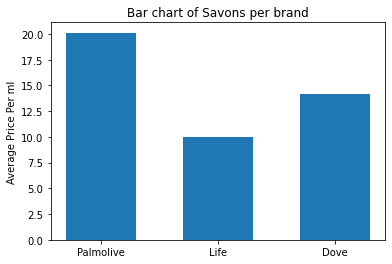

In [444]:
conn1.close()
engine = create_engine('sqlite:///superpharmDB5.db', echo=False,connect_args={'timeout': 100})
metadata = MetaData()
conn1 = engine.connect()

df = pd.read_sql_query("SELECT * FROM items", conn1)

# url_ = df.loc[0].image_url
# print(url_)
# a = df.iloc[0:50].id
# b = df.description.str.wrap(10)[0:50]
# # df.iloc[0:50].id
# df = a.to_frame().join(b)
# df.iloc[0:50][['description', 'id']]# , 'id']


# df[['description', 'id']][0:50]
# df.iloc[0:50,[0,2]].scr
#df.loc[0:50,['description', 'id']]
# for desc in df.description.replace('מ''ל' , 'מ"ל'):
#     print(desc.split())
# print(df.description.replace("מ''ל" , 'מ"ל'))
# df[df.description.str.contains('מ"ל')]
# print(prices)
df = pd.read_sql_query("SELECT id,name,description,category,brand,department,amount FROM items i INNER JOIN prices p ON i.id=p.item_id", conn1)
# df.reset_index
# df.index = df.id
df = df.set_index('id')
list(df.index)
# df.loc[521700]
# df.loc[521700]
# df.loc[521700]
# df[df.index == 521700]
# for n in list(df.index):

#     print(n)
savons = df[(df.name.str.contains('ג\'ל רחצה') | df.name.str.contains('סבון') | df.name.str.contains('תחליב'))]
savons = savons[savons.category == 'סבונים ומוצרי רחצה']

savons.loc[savons.description.str.contains('750'), 'perMl'] = savons.amount / 750 
savons.loc[savons.description.str.contains('500'), 'perMl'] = savons.amount / 500 
savons.loc[savons.description.str.contains('700'), 'perMl'] = savons.amount / 700 
savons.loc[savons.description.str.contains('650'), 'perMl'] = savons.amount / 650 

pal = savons[savons.brand == 'פלמוליב'].amount.mean()
life = savons[savons.brand == 'Life'].amount.mean()
dove = savons[savons.brand == 'דאב'].amount.mean()

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca()
ax.bar(x=list(range(3)), 
       width=0.6,
       height=[pal,life, dove],
       align='center',
       tick_label=['Palmolive','Life','Dove'])
ax.set_title('Bar chart of Savons per brand')
ax.set_ylabel('Average Price Per ml')
plt.show()








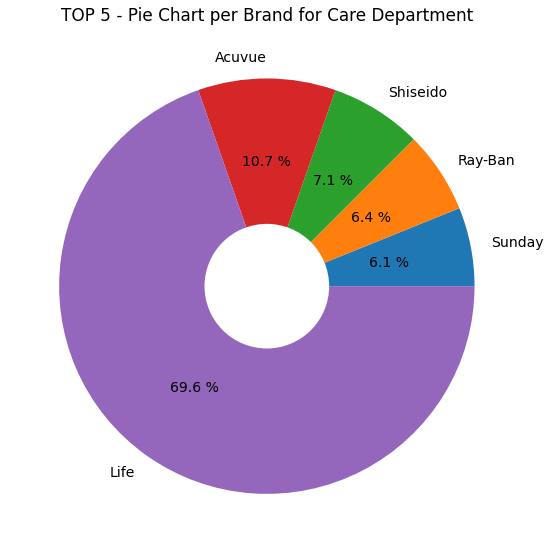

In [779]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
result = df.groupby(['brand']).count()
result = result.sort_values(by='name').tail(5)
result = result.reset_index()
brandname_dict = {'סקין גארד':'Skin Guard',
                 'ג\'ילט' : 'Gilette',
                 'ויט' : 'Veet',
                 'דאב' : 'Dove',
                 'אולוויז' : 'Always',
                 'סאנדיי' :'Sunday',
                 'Ray-Ban *יבוא מקביל' :'Ray-Ban', 
                 'SHISEIDO':'Shiseido',
                 'ACUVUE':'Acuvue',
                 'נטורל פורמולה' :'Natural Formula',
                 'לבלו':'Labello'}

result = result.replace({'brand': brandname_dict})
result = result.set_index("brand")

fig = plt.figure(figsize=(45,8))
centre_circle = plt.Circle((0,0),0.30,fc='white')
ax = fig.gca()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

ax.set_title('TOP 5 - Pie Chart per Brand for Care Department')
ax.pie(list(result.name), labels=list(result.index),autopct='%.1f %%',labeldistance=1.1)
plt.show()




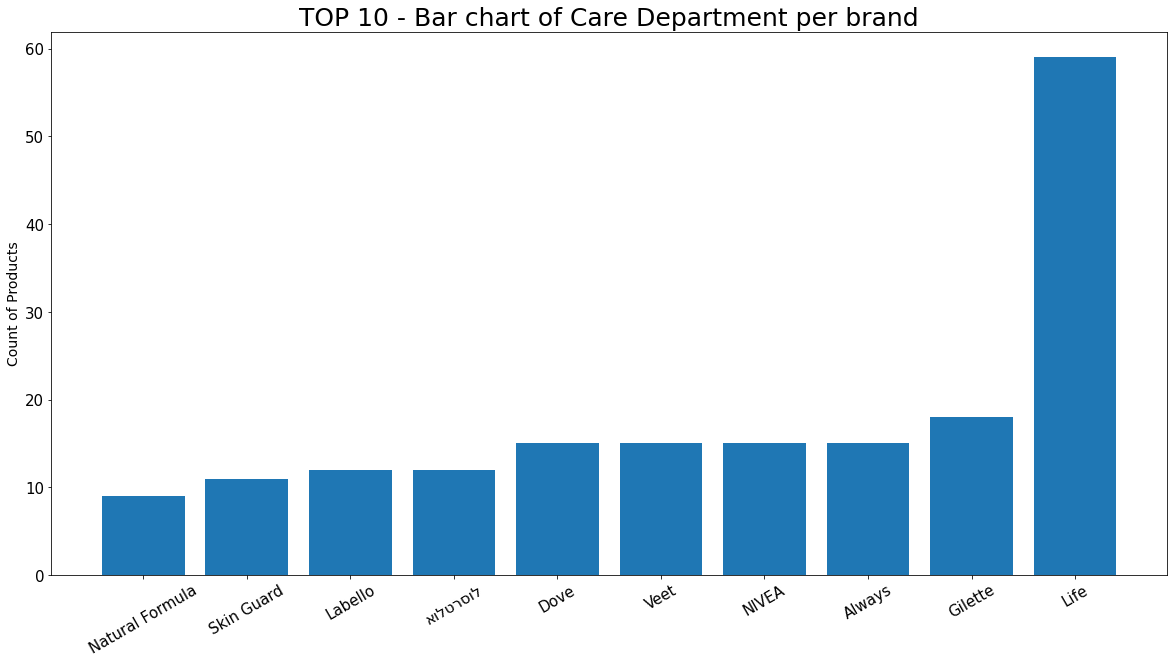

In [780]:
care_df = df[df.department == "טיפוח"]
result = care_df.groupby(['brand']).count()
result = result.sort_values(by='name').tail(10)
result = result.reset_index()
result = result.replace({'brand': brandname_dict})
result = result.set_index("brand")

fig = plt.figure(figsize=(20,10))
ax = fig.gca()
ax.bar(x=range(len(result.index)), \
       width=0.8,\
       height=list(result.name),\
       align='center',\
       tick_label=list(result.index))
ax.set_title('TOP 10 - Bar chart of Care Department per brand',fontsize=25)
plt.xticks(fontsize=15, rotation=30)
plt.yticks(fontsize=15)
ax.set_ylabel('Count of Products')
plt.show()

In [600]:
care_df = df[df.department == "טיפוח"]
result = care_df.groupby(['brand']).count()
# result = result[result.name > 10]


,name,description,category,department,amount
brand,,,,,
נטורל פורמולה,9,9,9,9,9
סקין גארד,11,11,11,11,11
לבלו,12,12,12,12,12
אולטרסול,12,12,12,12,12
דאב,15,15,15,15,15
ויט,15,15,15,15,15
NIVEA,15,15,15,15,15
אולוויז,15,15,15,15,15
ג'ילט,18,18,18,18,18


In [700]:
care_df = df[df.department == "טיפוח"]
result = care_df.groupby(['brand']).count()
result[result.name > 10]

,name,description,category,department,amount
brand,,,,,
Life,59,59,59,59,59
NIVEA,15,15,15,15,15
אולוויז,15,15,15,15,15
אולטרסול,12,12,12,12,12
ג'ילט,18,18,18,18,18
דאב,15,15,15,15,15
ויט,15,15,15,15,15
לבלו,12,12,12,12,12
סקין גארד,11,11,11,11,11


In [745]:
list(result.index)

d = {'apple': 1, 'peach': 6, 'watermelon': 4, 'grapes': 5, 'orange': 2,'banana': 3}

# df["fruit_tag"] = df["fruit_tag"].map(d)

In [751]:
d = dict(zip(['סאנדיי', 'Ray-Ban *יבוא מקביל', 'SHISEIDO', 'ACUVUE', 'Life'],['Sunday', 'Ray-Ban', 'Shiseido', 'Acuvue', 'Life']))

In [761]:


# result = result.set_index('brand')
result.index




Index(['Sunday', 'Ray-Ban', 'Shiseido', 'Acuvue', 'Life'], dtype='object', name='brand')

In [733]:
result.index.map(d))

SyntaxError: invalid syntax (<ipython-input-733-304257bfaccb>, line 1)